# Соревнование по Классификации(Линейные модели)

## Ссылка на соревнование

https://www.kaggle.com/competitions/urfu-engai-ml-2022-classification

## Целевая метрика

F1 macro >= 0.85

## Dataset Description

**Файлы**  
* Train.csv - Тренировочный набор данных  
* Target.csv - Целевые значения для тренировочного набора данных  
* Test.csv - Тестовый набор данных  
* Submission.csv - пример файла для загрузки решения 
  
**Колонки**  
* 'code' - Уникальный код контролируемого определителя, определенный в списке кодов,  
* 'year' - Год, в течение которого были отобраны данные,  
* 'period' - Период года, в течение которого производилась выборка данных,  
* 'id' - Уникальный международный идентификатор водного объекта, в котором получены данные,  
* 'Country' - Информация о стране, созданная с использованием координат,  
* 'tourists' - Среднее количество туристов по стране в период с 1990 по 2020 год,  
* 'venue' - Количество предприятий рядом с указанными координатами,  
* 'rate' - Уровень грамотности в стране в период с 2010 по 2018 год,  
* 'food' - доля пищевых отходов,  
* 'glass' - доля стеклянных отходов,  
* 'metal' - доля металлических отходов,  
* 'other' - доля прочих отходов,  
* 'paper' - доля бумажных отходов,  
* 'plastic' - доля пластмассовых отходов,  
* 'leather' - доля кожаных отходов,  
* 'green_waste' - доля зеленых отходов,  
* 'waste_recycling' - доля перерабатываемого мусора

### Import библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1

In [3]:
import warnings 
warnings.simplefilter("ignore", UserWarning)

### Считываем файлы в DataFrame

**Предварительная обработка файлов**  
Т.к. отсутствует столбец 'Index'

In [4]:
df = pd.read_csv('./Data/Kaggle2/train.csv', delimiter = ',')
df.columns = df.columns.str.replace('Unnamed: 0', 'idx')
df.to_csv('./Data/Kaggle2/train_idx.csv', index = False)
df = pd.read_csv('./Data/Kaggle2/target.csv', delimiter = ',')
df.columns = df.columns.str.replace('Unnamed: 0', 'idx')
df.to_csv('./Data/Kaggle2/target_idx.csv', index = False)
df = pd.read_csv('./Data/Kaggle2/test.csv', delimiter = ',')
df.columns = df.columns.str.replace('Unnamed: 0', 'idx')
df.to_csv('./Data/Kaggle2/test_idx.csv', index = False)

**Тренировочная выборка**

In [5]:
df_train = pd.read_csv('./Data/Kaggle2/train_idx.csv', delimiter = ',', index_col = 'idx')
df_train.head(3)

,code,year,period,id,Country,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling
idx,,,,,,,,,,,,,,,,,
11,EEA_3161-03-3,2009,2009-04--2009-10,FRGR0220,France,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
20,EEA_3161-05-5,2009,2009-01--2009-12,FRDR179,France,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
27,EEA_3161-01-1,2009,2009-01--2009-12,FRDR174,France,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26


In [6]:
df_train.shape

(2928, 17)

**Целевые значения для тренировочной выборки**

In [7]:
target = pd.read_csv('./Data/Kaggle2/target_idx.csv', delimiter = ',', index_col = 'idx')
target.head(3)

,polution_clf
idx,
11,0
20,0
27,0


In [8]:
target.shape

(2928, 1)

**Объединим тренировочную выборку и ее целевые значения**

In [9]:
df_train = df_train.join(target, on='idx')
df_train.head(3)

,code,year,period,id,Country,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution_clf
idx,,,,,,,,,,,,,,,,,,
11,EEA_3161-03-3,2009,2009-04--2009-10,FRGR0220,France,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0
20,EEA_3161-05-5,2009,2009-01--2009-12,FRDR179,France,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0
27,EEA_3161-01-1,2009,2009-01--2009-12,FRDR174,France,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0


In [10]:
df_train.shape

(2928, 18)

**Тестовая выборка**

In [11]:
df_test = pd.read_csv('./Data/Kaggle2/test_idx.csv', delimiter = ',', index_col = 'idx')
df_test.head(3)

,code,year,period,id,Country,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling
idx,,,,,,,,,,,,,,,,,
19,EEA_3161-01-1,2009,2009-01--2009-12,FRDR179,France,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
46,EEA_31615-01-7,2009,2009-01--2009-12,FRGR0004B,France,71176346.0,2.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26
94,EEA_3161-02-2,2007,2007-01--2007-12,UKSC023165,United Kingdom,25867961.0,0.0,0.0,16.7,2.2,3.5,28.2,18.9,20.2,0.0,2.7,27.25


In [12]:
df_test.shape

(732, 17)

### Первичный анализ данных

Типы данных в датасете

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 11 to 19914
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   code             2928 non-null   object 
 1   year             2928 non-null   int64  
 2   period           2928 non-null   object 
 3   id               2928 non-null   object 
 4   Country          2928 non-null   object 
 5   tourists         2928 non-null   float64
 6   venue            2928 non-null   float64
 7   rate             2928 non-null   float64
 8   food             2928 non-null   float64
 9   glass            2928 non-null   float64
 10  metal            2928 non-null   float64
 11  other            2928 non-null   float64
 12  paper            2928 non-null   float64
 13  plastic          2928 non-null   float64
 14  leather          2928 non-null   float64
 15  green_waste      2928 non-null   float64
 16  waste_recycling  2928 non-null   float64
 17  polution_clf

Разделим категориальные и числовые признаки датасета

In [14]:
c_names = df_train.columns
c_names

Index(['code', 'year', 'period', 'id', 'Country', 'tourists', 'venue', 'rate',
       'food', 'glass', 'metal', 'other', 'paper', 'plastic', 'leather',
       'green_waste', 'waste_recycling', 'polution_clf'],
      dtype='object')

In [15]:
num_col = ['tourists', 'venue', 'rate', 
           'food', 'glass', 'metal', 'other', 'paper', 'plastic',
           'leather', 'green_waste', 'waste_recycling', 'polution_clf']

In [16]:
cat_col = ['code','year', 'period','id', 'Country'] # год тоже отнесем к категориальным признакам

Построим матрицу корреляций для числовых признаков

In [17]:
df_train[num_col].corr()

,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution_clf
tourists,1.000000,0.022439,-0.124968,0.268360,0.592654,-0.172862,0.238286,-0.149313,-0.446333,-0.290314,-0.594133,-0.433875,0.059342
venue,0.022439,1.000000,0.010740,-0.004489,-0.016762,-0.003195,0.010315,-0.027494,0.021600,-0.018602,-0.003737,-0.024583,0.012593
rate,-0.124968,0.010740,1.000000,0.740871,-0.057592,-0.045132,-0.620799,-0.451211,-0.134422,-0.023170,-0.097997,-0.500871,-0.105192
food,0.268360,-0.004489,0.740871,1.000000,0.544469,-0.182384,-0.577821,-0.311257,-0.687537,0.040329,-0.416785,-0.631083,-0.072265
glass,0.592654,-0.016762,-0.057592,0.544469,1.000000,-0.163073,-0.199137,0.079687,-0.842536,0.222589,-0.405530,-0.272243,0.003141
metal,-0.172862,-0.003195,-0.045132,-0.182384,-0.163073,1.000000,-0.324033,0.245829,0.090351,-0.242707,0.589619,0.115796,-0.040473
other,0.238286,0.010315,-0.620799,-0.577821,-0.199137,-0.324033,1.000000,-0.210224,0.378525,-0.221586,-0.238821,0.182704,0.125073
paper,-0.149313,-0.027494,-0.451211,-0.311257,0.079687,0.245829,-0.210224,1.000000,-0.271054,-0.050346,0.268961,0.487987,-0.076409
plastic,-0.446333,0.021600,-0.134422,-0.687537,-0.842536,0.090351,0.378525,-0.271054,1.000000,0.041048,0.303210,0.350718,0.080831
leather,-0.290314,-0.018602,-0.023170,0.040329,0.222589,-0.242707,-0.221586,-0.050346,0.041048,1.000000,0.051185,0.498405,0.095065


Определим признаки, которые имеют значительную корреляцию с целевой переменной

In [18]:
main_num_col = ['rate', 'other']

Рассмотрим количественные переменные объединенного датасета

In [19]:
df_train.describe()

,year,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution_clf
count,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000
mean,2008.645492,5.617204e+07,0.094945,11.160783,31.939652,8.567579,3.090536,24.115212,19.682114,10.477510,0.093169,0.808798,23.006398,0.505123
std,0.924558,2.271813e+07,0.573770,28.527411,8.823490,2.936677,0.885107,6.205081,4.197326,4.153063,0.578123,2.521736,4.799046,0.500059
min,2005.000000,5.300380e+05,0.000000,0.000000,14.180000,2.200000,1.380000,0.000000,6.100000,1.450000,0.000000,0.000000,0.760000,0.000000
25%,2008.000000,5.094169e+07,0.000000,0.000000,32.000000,8.000000,3.000000,26.000000,18.900000,9.000000,0.000000,0.000000,22.260000,0.000000
50%,2009.000000,7.117635e+07,0.000000,0.000000,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,22.260000,1.000000
75%,2009.000000,7.117635e+07,0.000000,0.000000,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,22.260000,1.000000
max,2017.000000,7.117635e+07,7.000000,87.158924,62.300000,21.400000,9.200000,44.050000,37.830000,22.900000,4.000000,19.180000,47.830000,1.000000


Целевая переменная

Text(0.5, 1.0, 'Target')

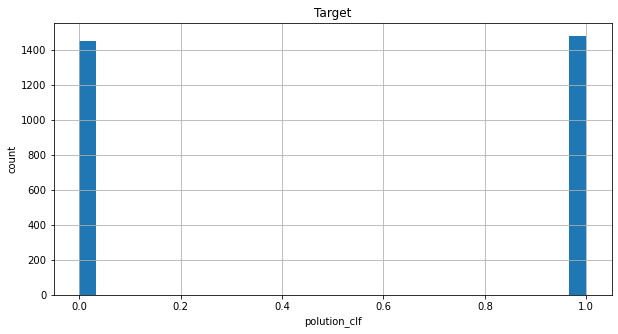

In [20]:
plt.figure(figsize = (10, 5))
target['polution_clf'].hist(bins=30)
plt.ylabel('count')
plt.xlabel('polution_clf')
plt.title('Target')

*Вывод: целевая переменная сбалансирована в датасете, нет перекоса в данных*

Проверим датасет на пропуски значений

In [21]:
df_train.isnull().sum()

code               0
year               0
period             0
id                 0
Country            0
tourists           0
venue              0
rate               0
food               0
glass              0
metal              0
other              0
paper              0
plastic            0
leather            0
green_waste        0
waste_recycling    0
polution_clf       0
dtype: int64

Разобьем обратно тренировочную выбору на саму выборку и целевые значения

In [22]:
target = df_train['polution_clf']

In [23]:
target.shape

(2928,)

In [24]:
df_train = df_train.drop(['polution_clf'], axis=1)

In [25]:
df_train.shape

(2928, 17)

Постоим карту попарных зависимостей признаков

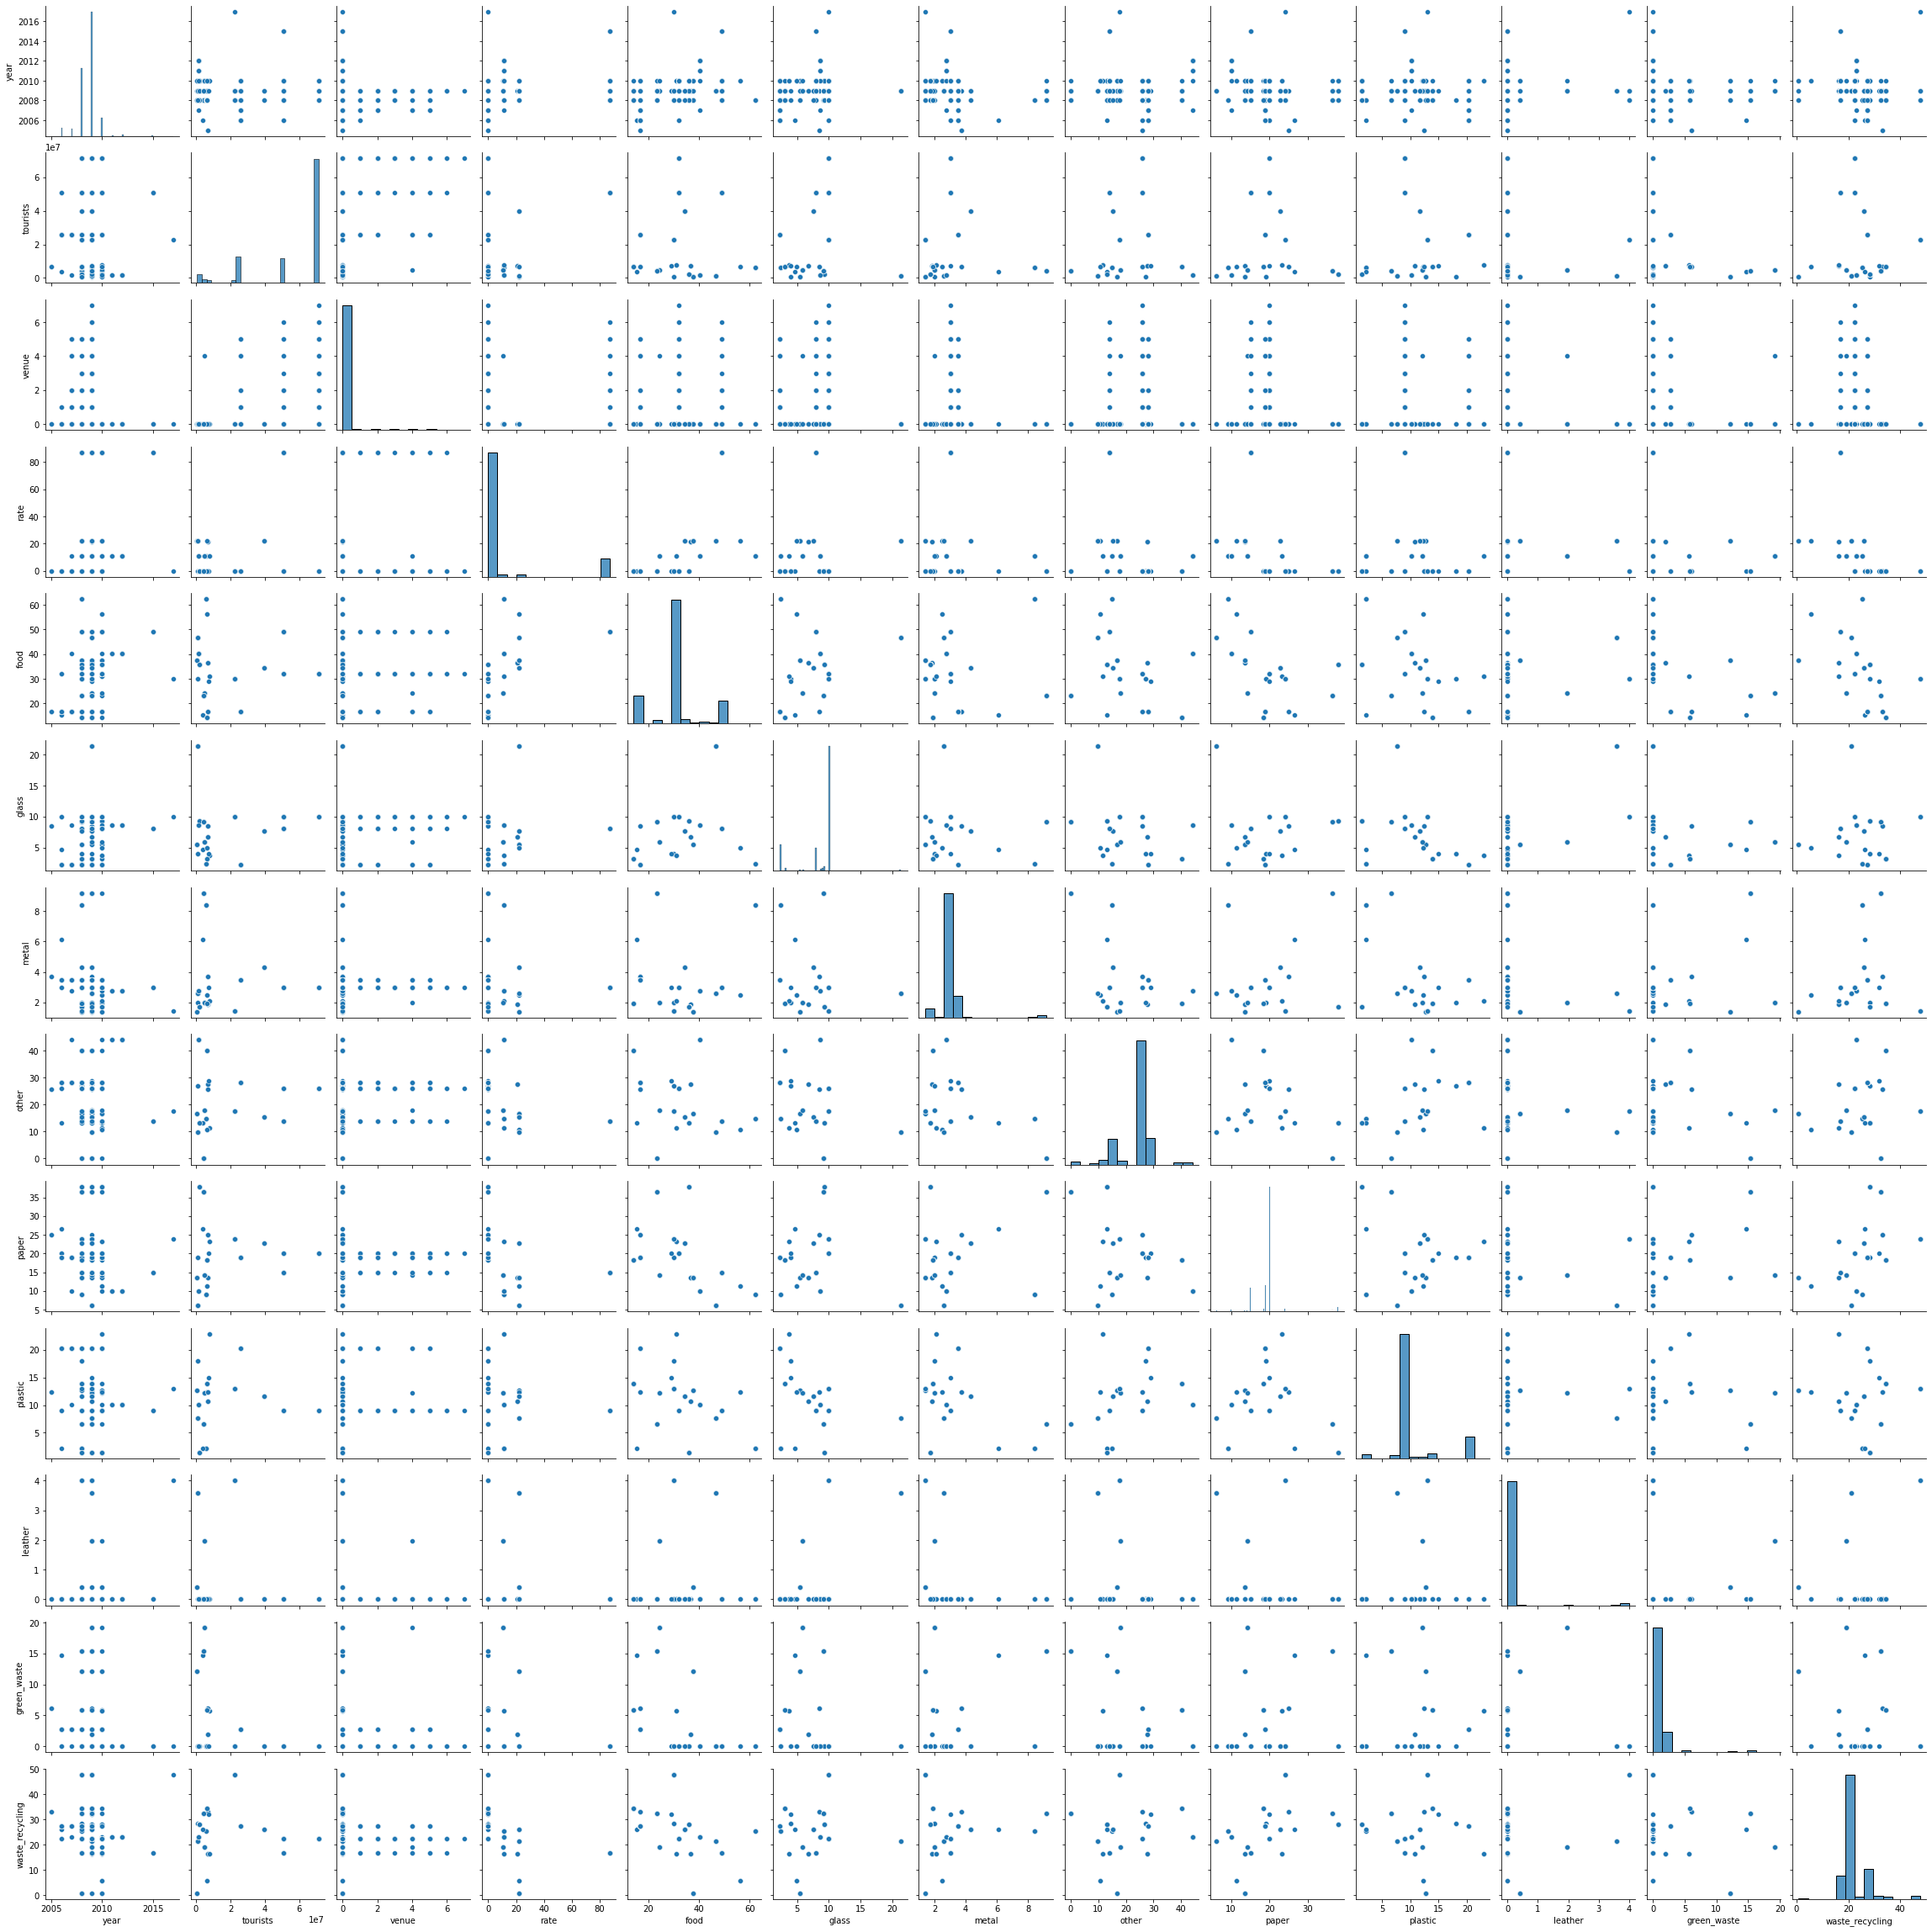

In [26]:
sns.pairplot(df_train)

In [27]:
# очень интересно, но опять непонятно

Посмотрим количество уникальных  значений по каждому из признаков

In [28]:
c_names = df_train.columns
c_names

Index(['code', 'year', 'period', 'id', 'Country', 'tourists', 'venue', 'rate',
       'food', 'glass', 'metal', 'other', 'paper', 'plastic', 'leather',
       'green_waste', 'waste_recycling'],
      dtype='object')

In [29]:
for x in c_names:
    print(f'Столбец "{x}": количество уникальных значений {df_train[x].nunique()}')

Столбец "code": количество уникальных значений 5
Столбец "year": количество уникальных значений 10
Столбец "period": количество уникальных значений 21
Столбец "id": количество уникальных значений 1447
Столбец "Country": количество уникальных значений 21
Столбец "tourists": количество уникальных значений 20
Столбец "venue": количество уникальных значений 8
Столбец "rate": количество уникальных значений 11
Столбец "food": количество уникальных значений 19
Столбец "glass": количество уникальных значений 18
Столбец "metal": количество уникальных значений 18
Столбец "other": количество уникальных значений 20
Столбец "paper": количество уникальных значений 19
Столбец "plastic": количество уникальных значений 19
Столбец "leather": количество уникальных значений 5
Столбец "green_waste": количество уникальных значений 10
Столбец "waste_recycling": количество уникальных значений 20


Определим столбцы, которые будем удалять:

In [30]:
col_drop = []

In [31]:
col_drop.extend([
#    'code', 
    'year', 
#    'period', 
#    'id', 
    'Country', 
    'tourists', 
    'venue', 
    'rate',
    'food', 
#    'glass',
    'metal',
#    'other',
#    'paper',
    'plastic',
    'leather',#
#    'green_waste',
#    'waste_recycling'
])
col_drop

['year',
 'Country',
 'tourists',
 'venue',
 'rate',
 'food',
 'metal',
 'plastic',
 'leather']

In [32]:
for x in col_drop:
    if x in cat_col:
        cat_col.remove(x)
cat_col

['code', 'period', 'id']

In [33]:
for x in col_drop:
    if x in num_col:
        num_col.remove(x)
num_col

['glass', 'other', 'paper', 'green_waste', 'waste_recycling', 'polution_clf']

In [34]:
num_col

['glass', 'other', 'paper', 'green_waste', 'waste_recycling', 'polution_clf']

In [35]:
cat_col

['code', 'period', 'id']

### Объединяем тренировочную и тестовую выборки, чтобы не делать работу 2 раза

In [36]:
df_total = pd.concat([df_train, df_test])

In [37]:
df_total = df_total.drop(col_drop, axis=1)
df_total.head(3)

,code,period,id,glass,other,paper,green_waste,waste_recycling
idx,,,,,,,,
11,EEA_3161-03-3,2009-04--2009-10,FRGR0220,10.0,26.0,20.0,0.0,22.26
20,EEA_3161-05-5,2009-01--2009-12,FRDR179,10.0,26.0,20.0,0.0,22.26
27,EEA_3161-01-1,2009-01--2009-12,FRDR174,10.0,26.0,20.0,0.0,22.26


### Применяем one-hot-encoding для категориальных столбцов

In [38]:
for col in cat_col:
    df_total = pd.concat([df_total, pd.get_dummies(df_total[col], prefix=f'{col}_')], axis=1, sort=False)
    df_total = df_total.drop([col], axis=1)
df_total.head()

,glass,other,paper,green_waste,waste_recycling,code__EEA_3161-01-1,code__EEA_3161-02-2,code__EEA_3161-03-3,code__EEA_3161-05-5,code__EEA_31615-01-7,...,id__UKSC023282,id__UKSC023294,id__UKSC023295,id__UKSC023315,id__UKSC023319,id__UKSC023332,id__UKSC023345,id__UKSC023346,id__UKSC023347,id__UKSC023371
idx,,,,,,,,,,,,,,,,,,,,,
11,10.0,26.0,20.0,0.0,22.26,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20,10.0,26.0,20.0,0.0,22.26,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
27,10.0,26.0,20.0,0.0,22.26,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,10.0,26.0,20.0,0.0,22.26,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
33,10.0,26.0,20.0,0.0,22.26,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Проведем нормализацию оставшихся числовых признаков

In [39]:
col_names = df_total.columns
col_names

Index(['glass', 'other', 'paper', 'green_waste', 'waste_recycling',
       'code__EEA_3161-01-1', 'code__EEA_3161-02-2', 'code__EEA_3161-03-3',
       'code__EEA_3161-05-5', 'code__EEA_31615-01-7',
       ...
       'id__UKSC023282', 'id__UKSC023294', 'id__UKSC023295', 'id__UKSC023315',
       'id__UKSC023319', 'id__UKSC023332', 'id__UKSC023345', 'id__UKSC023346',
       'id__UKSC023347', 'id__UKSC023371'],
      dtype='object', length=1645)

In [40]:
scaler  = MinMaxScaler()
scaler.fit_transform(df_total)
df_total = scaler.transform(df_total) 

In [41]:
df_total = pd.DataFrame(df_total, columns=col_names)
df_total.head(3)

,glass,other,paper,green_waste,waste_recycling,code__EEA_3161-01-1,code__EEA_3161-02-2,code__EEA_3161-03-3,code__EEA_3161-05-5,code__EEA_31615-01-7,...,id__UKSC023282,id__UKSC023294,id__UKSC023295,id__UKSC023315,id__UKSC023319,id__UKSC023332,id__UKSC023345,id__UKSC023346,id__UKSC023347,id__UKSC023371
0,0.40625,0.590238,0.438071,0.0,0.456767,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.40625,0.590238,0.438071,0.0,0.456767,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.40625,0.590238,0.438071,0.0,0.456767,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Разбиваем данные обратно на Тренировочную и Тестовую

In [42]:
train = df_total.iloc[0:df_train.shape[0],:]
test = df_total.iloc[df_train.shape[0]:,:]

In [43]:
df_train.shape[0], train.shape[0], df_test.shape[0], test.shape[0], 

(2928, 2928, 732, 732)

### Разобьем тренировочную выборку на тренировочную и валидационную и обучим модель логистической регрессии

In [44]:
X = train
y = target

In [45]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [46]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape 

((1961, 1645), (967, 1645), (1961,), (967,))

In [47]:
%%time

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_val_pred = model_lr.predict(X_val)

Wall time: 326 ms


Целевая метрика

In [48]:
f1(y_train, y_train_pred, average='macro')

0.8732364115588809

In [49]:
f1(y_val, y_val_pred, average='macro')

0.7838050792272628

*Вывод: т.к. на валидационной выборке происходит падения скора, то требуется применение регуляризации*

### Применим к логистической регрессии регуляризацию

Сначала определим наилучшее значение макропараметра

In [50]:
%%time
#solver=['lbfgs', 'liblinear', 'newton-cg', 'newton-cg', 'sag', 'saga']
#tol = [0.00001, 0.0001, 0.001, 0.01, 0.1]
si = [9.0, 9.5, 10.0, 10.5, 11.0]
for c in si:
    model_lr = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, tol=000.1, C=c)
    model_lr.fit(X_train, y_train)
    y_train_pred = model_lr.predict(X_train)
    y_val_pred = model_lr.predict(X_val)
    print(f'{c}:')
    print(f"F1 train: {f1(y_train, y_train_pred, average='macro')}")
    print(f"F1 val: {f1(y_val, y_val_pred, average='macro')}")
    print('-'*50)

9.0:
F1 train: 0.9841917224654058
F1 val: 0.8136157529592791
--------------------------------------------------
9.5:
F1 train: 0.9841917224654058
F1 val: 0.8146248686092397
--------------------------------------------------
10.0:
F1 train: 0.9841917224654058
F1 val: 0.8162522584807765
--------------------------------------------------
10.5:
F1 train: 0.9841917224654058
F1 val: 0.8151901289286299
--------------------------------------------------
11.0:
F1 train: 0.9847016470108532
F1 val: 0.8151901289286299
--------------------------------------------------
Wall time: 1.89 s


*Вывод: наилучшее значение: 10.0*

**Проведем регуляризацию**

In [51]:
model_lr = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, tol=000.1, C=10.0)
model_lr.fit(X_train, y_train)
y_train_pred = model_lr.predict(X_train)
y_val_pred = model_lr.predict(X_val)

In [52]:
y_val_pred_proba = model_lr.predict_proba(X_val)

In [53]:
y_val_pred_modify = []

Целевая метрика

In [54]:
f1(y_train, y_train_pred, average='macro')

0.9841917224654058

In [55]:
f1(y_val, y_val_pred, average='macro')

0.8162522584807765

**Дополнительно скорректируем параметр порогового значения, который относит получившееся предсказание к одному из классов**

In [56]:
for x in range(len(y_val_pred_proba)):
    if y_val_pred_proba[x][0] >= 0.4:
        y_val_pred_modify.append(0)
    else:
        y_val_pred_modify.append(1)

In [57]:
y_val_pred_modify = np.asarray(y_val_pred_modify)

In [58]:
f1(y_val, y_val_pred_modify, average='macro')

0.8220981474350747

### Обучаем на лучшей из полученных моделей тестовую выборку

Делаем это с учетом скорректированного параметра порогового значения

In [59]:
y_test = model_lr.predict_proba(test)

In [60]:
y_test_modify = []

In [61]:
for x in range(len(y_test)):
    if y_test[x][0] >= 0.4:
        y_test_modify.append(0)
    else:
        y_test_modify.append(1)

In [62]:
y_test_modify = np.asarray(y_test_modify)

In [63]:
test_col_drop = df_test.columns

In [64]:
test_col_drop

Index(['code', 'year', 'period', 'id', 'Country', 'tourists', 'venue', 'rate',
       'food', 'glass', 'metal', 'other', 'paper', 'plastic', 'leather',
       'green_waste', 'waste_recycling'],
      dtype='object')

In [65]:
df_test['polution_clf'] = y_test_modify

In [66]:
df_test = df_test.drop(test_col_drop, axis=1)
df_test.head(3)

,polution_clf
idx,
19,0
46,1
94,0


Сохранение полученного предсказания

In [67]:
df_test.to_csv('RIM120906_PopovMV_kaggle2_final.csv', index = True)

In [68]:
#leaderboard 0.81685